In [30]:
import pandas as pd         
import numpy as np            
import matplotlib.pyplot as plt        
import seaborn as sns 

In [31]:
df = pd.read_csv("drone_meta_data.csv")

In [32]:
df.head()

,time(millisecond),datetime(utc),latitude,longitude,height_above_takeoff(feet),height_above_ground_at_drone_location(feet),ground_elevation_at_drone_location(feet),altitude_above_seaLevel(feet),height_sonar(feet),speed(mph),...,voltageCell4,voltageCell5,voltageCell6,current(A),battery_temperature(f),altitude(feet),ascent(feet),flycStateRaw,flycState,message
0,0,7/12/2021 19:52,38.104154,-84.757244,0.0,0.0,893.551412,893.551412,0.328084,0.0,...,4.264,0,0,0.000,84.11,893.551412,0.0,41,Motors_Started,NaN
1,100,7/12/2021 19:52,38.104154,-84.757244,0.0,0.0,893.551412,893.551412,0.328084,0.0,...,4.264,0,0,0.000,84.11,893.551412,0.0,41,Motors_Started,NaN
2,200,7/12/2021 19:52,38.104154,-84.757244,0.0,0.0,893.551412,893.551412,0.328084,0.0,...,4.264,0,0,1.218,84.11,893.551412,0.0,41,Motors_Started,Setting new Return-To-Home altitude to 50m (16...
3,300,7/12/2021 19:52,38.104154,-84.757244,0.0,0.0,893.551412,893.551412,0.328084,0.0,...,4.264,0,0,1.218,84.11,893.551412,0.0,41,Motors_Started,NaN
4,400,7/12/2021 19:52,38.104154,-84.757244,0.0,0.0,893.551412,893.551412,0.328084,0.0,...,4.264,0,0,1.218,84.11,893.551412,0.0,41,Motors_Started,NaN


In [33]:
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['time(millisecond)', 'datetime(utc)', 'latitude', 'longitude',
       'height_above_takeoff(feet)',
       'height_above_ground_at_drone_location(feet)',
       'ground_elevation_at_drone_location(feet)',
       'altitude_above_sealevel(feet)', 'height_sonar(feet)', 'speed(mph)',
       'distance(feet)', 'mileage(feet)', 'satellites', 'gpslevel',
       'voltage(v)', 'max_altitude(feet)', 'max_ascent(feet)',
       'max_speed(mph)', 'max_distance(feet)', 'xspeed(mph)', 'yspeed(mph)',
       'zspeed(mph)', 'compass_heading(degrees)', 'pitch(degrees)',
       'roll(degrees)', 'isphoto', 'isvideo', 'rc_elevator', 'rc_aileron',
       'rc_throttle', 'rc_rudder', 'rc_elevator(percent)',
       'rc_aileron(percent)', 'rc_throttle(percent)', 'rc_rudder(percent)',
       'gimbal_heading(degrees)', 'gimbal_pitch(degrees)',
       'gimbal_roll(degrees)', 'battery_percent', 'voltagecell1',
       'voltagecell2', 'voltagecell3', 'voltagecell4', 'voltagecell5',
       'voltagecell6', 'curren

In [34]:
df.isna().sum()

time(millisecond)                                 0
datetime(utc)                                     0
latitude                                          0
longitude                                         0
height_above_takeoff(feet)                        0
height_above_ground_at_drone_location(feet)       0
ground_elevation_at_drone_location(feet)          0
altitude_above_sealevel(feet)                     0
height_sonar(feet)                                0
speed(mph)                                        0
distance(feet)                                    0
mileage(feet)                                     0
satellites                                        0
gpslevel                                          0
voltage(v)                                        0
max_altitude(feet)                                0
max_ascent(feet)                                  0
max_speed(mph)                                    0
max_distance(feet)                                0
xspeed(mph) 

In [35]:
df = df.dropna()

In [36]:
print(df.shape)

(19, 52)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2 to 3668
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time(millisecond)                            19 non-null     int64  
 1   datetime(utc)                                19 non-null     object 
 2   latitude                                     19 non-null     float64
 3   longitude                                    19 non-null     float64
 4   height_above_takeoff(feet)                   19 non-null     float64
 5   height_above_ground_at_drone_location(feet)  19 non-null     float64
 6   ground_elevation_at_drone_location(feet)     19 non-null     float64
 7   altitude_above_sealevel(feet)                19 non-null     float64
 8   height_sonar(feet)                           19 non-null     float64
 9   speed(mph)                                   19 non-null     float64
 10  distanc

<Axes: >

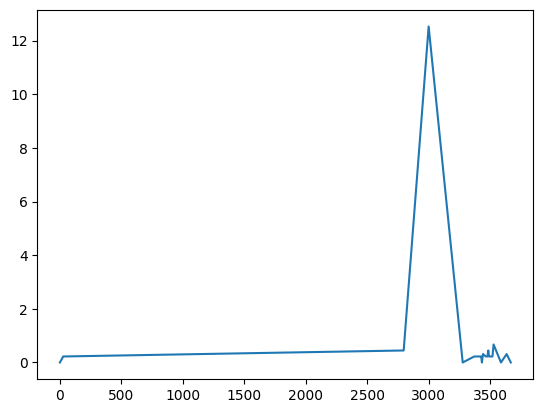

In [38]:
df["speed(mph)"].plot(kind="line")

In [39]:
df["isflying"] = ["flying" if speed > 0 else "not_flying" for speed in df["speed(mph)"]]
df["isflying"]

2       not_flying
29          flying
2797        flying
3000        flying
3277    not_flying
3371        flying
3425        flying
3428        flying
3433    not_flying
3442        flying
3465        flying
3478        flying
3485        flying
3491        flying
3519        flying
3528        flying
3588    not_flying
3634        flying
3668    not_flying
Name: isflying, dtype: object

In [40]:
df.head(4)

,time(millisecond),datetime(utc),latitude,longitude,height_above_takeoff(feet),height_above_ground_at_drone_location(feet),ground_elevation_at_drone_location(feet),altitude_above_sealevel(feet),height_sonar(feet),speed(mph),...,voltagecell5,voltagecell6,current(a),battery_temperature(f),altitude(feet),ascent(feet),flycstateraw,flycstate,message,isflying
2,200,7/12/2021 19:52,38.104154,-84.757244,0.000000,0.000000,893.551412,893.551412,0.328084,0.000000,...,0,0,1.218,84.11,893.551412,0.000000,41,Motors_Started,Setting new Return-To-Home altitude to 50m (16...,not_flying
29,3200,7/12/2021 19:52,38.104155,-84.757244,2.296588,2.329396,893.518604,895.848000,2.952756,0.223694,...,0,0,3.480,84.11,895.848000,2.296588,6,P-GPS,Home Point recorded. Return-to-Home Altitude:1...,flying
2797,301300,7/12/2021 19:57,38.105495,-84.757316,10.826772,19.586615,884.791569,904.378184,26.902888,0.447388,...,0,0,11.024,107.51,904.378184,10.826772,15,Go_Home,Aircraft is returning to the Home Point. RTH A...,flying
3000,323400,7/12/2021 19:57,38.105420,-84.757320,164.698168,173.720478,884.529102,1058.249580,0.000000,12.526864,...,0,0,13.740,109.31,1058.249580,164.698168,15,Go_Home,Forward Obstacle Sensing is not functioning.,flying


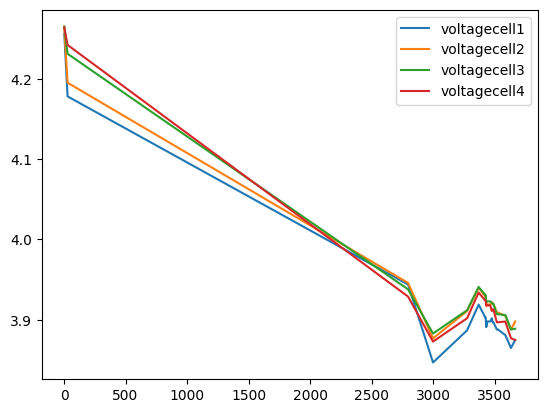

In [41]:
df["voltagecell1"].plot(kind="line")
df["voltagecell2"].plot(kind="line")
df["voltagecell3"].plot(kind="line")
df["voltagecell4"].plot(kind="line")
plt.legend()
plt.show()

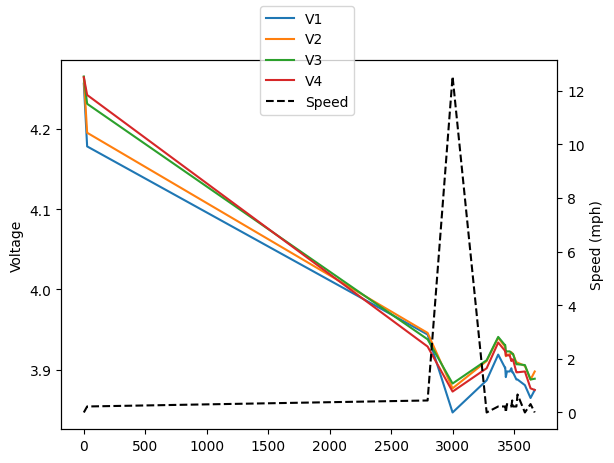

In [42]:
fig, ax1 = plt.subplots()

df["voltagecell1"].plot(ax=ax1, label="V1")
df["voltagecell2"].plot(ax=ax1, label="V2")
df["voltagecell3"].plot(ax=ax1, label="V3")
df["voltagecell4"].plot(ax=ax1, label="V4")
# df["current(a)"].plot(ax=ax1, label="IA")

ax1.set_ylabel("Voltage")

ax2 = ax1.twinx()
df["speed(mph)"].plot(ax=ax2, color="black", linestyle="--", label="Speed")

ax2.set_ylabel("Speed (mph)")

fig.legend(loc="upper center")
plt.show()


In [43]:
df["flycstate"].unique()

array(['Motors_Started', 'P-GPS', 'Go_Home', 'AutoLanding'], dtype=object)

In [44]:
df[df["flycstate"] == "Motors_Started"]

,time(millisecond),datetime(utc),latitude,longitude,height_above_takeoff(feet),height_above_ground_at_drone_location(feet),ground_elevation_at_drone_location(feet),altitude_above_sealevel(feet),height_sonar(feet),speed(mph),...,voltagecell5,voltagecell6,current(a),battery_temperature(f),altitude(feet),ascent(feet),flycstateraw,flycstate,message,isflying
2,200,7/12/2021 19:52,38.104154,-84.757244,0.0,0.0,893.551412,893.551412,0.328084,0.0,...,0,0,1.218,84.11,893.551412,0.0,41,Motors_Started,Setting new Return-To-Home altitude to 50m (16...,not_flying


In [45]:
df_num = df.select_dtypes(include=["int64", "float64"])

In [46]:
# sns.pairplot(data=df_num)
# plt.show()

In [47]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ncomp = 2
pipe = Pipeline([('scaler', StandardScaler()),
                 ("pca", PCA(n_components=ncomp))])

pca_df = pipe.fit_transform(df_num)
rez = pd.DataFrame(pca_df, columns=["PC1", "PC2"])

In [48]:
rez.shape

(19, 2)

In [49]:
df["isflying"].shape

(19,)

In [50]:
rez['fly_status'] = df["isflying"].values
rez.head()

,PC1,PC2,fly_status
0,-12.170482,-0.871905,not_flying
1,-12.088860,-1.318477,flying
2,-0.584471,-4.117933,flying
3,4.203066,-10.625070,flying
4,2.730906,-2.891342,not_flying


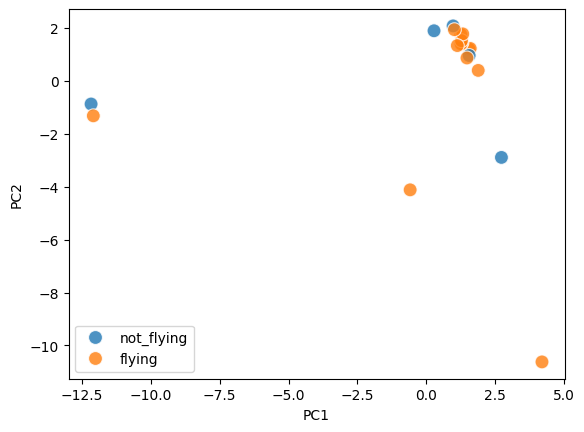

In [51]:
sns.scatterplot(data=rez, x = "PC1", y = "PC2", 
                hue="fly_status",
                s = 100,
                alpha = 0.8)
plt.legend(loc="lower left")
plt.show()

In [52]:
df.head()

,time(millisecond),datetime(utc),latitude,longitude,height_above_takeoff(feet),height_above_ground_at_drone_location(feet),ground_elevation_at_drone_location(feet),altitude_above_sealevel(feet),height_sonar(feet),speed(mph),...,voltagecell5,voltagecell6,current(a),battery_temperature(f),altitude(feet),ascent(feet),flycstateraw,flycstate,message,isflying
2,200,7/12/2021 19:52,38.104154,-84.757244,0.000000,0.000000,893.551412,893.551412,0.328084,0.000000,...,0,0,1.218,84.11,893.551412,0.000000,41,Motors_Started,Setting new Return-To-Home altitude to 50m (16...,not_flying
29,3200,7/12/2021 19:52,38.104155,-84.757244,2.296588,2.329396,893.518604,895.848000,2.952756,0.223694,...,0,0,3.480,84.11,895.848000,2.296588,6,P-GPS,Home Point recorded. Return-to-Home Altitude:1...,flying
2797,301300,7/12/2021 19:57,38.105495,-84.757316,10.826772,19.586615,884.791569,904.378184,26.902888,0.447388,...,0,0,11.024,107.51,904.378184,10.826772,15,Go_Home,Aircraft is returning to the Home Point. RTH A...,flying
3000,323400,7/12/2021 19:57,38.105420,-84.757320,164.698168,173.720478,884.529102,1058.249580,0.000000,12.526864,...,0,0,13.740,109.31,1058.249580,164.698168,15,Go_Home,Forward Obstacle Sensing is not functioning.,flying
3277,352200,7/12/2021 19:58,38.104160,-84.757246,163.385832,163.418640,893.518604,1056.937244,0.000000,0.000000,...,0,0,10.080,112.91,1056.937244,163.385832,12,AutoLanding,Obstacle Avoidance will be disabled in landing.,not_flying


In [53]:
df_num

,time(millisecond),latitude,longitude,height_above_takeoff(feet),height_above_ground_at_drone_location(feet),ground_elevation_at_drone_location(feet),altitude_above_sealevel(feet),height_sonar(feet),speed(mph),distance(feet),...,voltagecell2,voltagecell3,voltagecell4,voltagecell5,voltagecell6,current(a),battery_temperature(f),altitude(feet),ascent(feet),flycstateraw
2,200,38.104154,-84.757244,0.000000,0.000000,893.551412,893.551412,0.328084,0.000000,0.029301,...,4.264,4.265,4.264,0,0,1.218,84.11,893.551412,0.000000,41
29,3200,38.104155,-84.757244,2.296588,2.329396,893.518604,895.848000,2.952756,0.223694,0.603022,...,4.195,4.231,4.242,0,0,3.480,84.11,895.848000,2.296588,6
2797,301300,38.105495,-84.757316,10.826772,19.586615,884.791569,904.378184,26.902888,0.447388,489.839254,...,3.946,3.938,3.929,0,0,11.024,107.51,904.378184,10.826772,15
3000,323400,38.105420,-84.757320,164.698168,173.720478,884.529102,1058.249580,0.000000,12.526864,462.657495,...,3.877,3.883,3.873,0,0,13.740,109.31,1058.249580,164.698168,15
3277,352200,38.104160,-84.757246,163.385832,163.418640,893.518604,1056.937244,0.000000,0.000000,2.177913,...,3.911,3.912,3.902,0,0,10.080,112.91,1056.937244,163.385832,12
3371,362000,38.104159,-84.757242,132.874020,132.874020,893.551412,1026.425432,0.000000,0.223694,1.967159,...,3.940,3.941,3.934,0,0,6.684,112.91,1026.425432,132.874020,12
3425,367600,38.104143,-84.757244,87.598428,87.598428,893.551412,981.149840,0.000000,0.223694,3.898327,...,3.929,3.931,3.924,0,0,8.684,112.91,981.149840,87.598428,12
3428,367900,38.104143,-84.757245,85.958008,85.990816,893.518604,979.509420,0.000000,0.223694,3.906037,...,3.929,3.931,3.924,0,0,8.684,112.91,979.509420,85.958008,12
3433,368400,38.104143,-84.757245,82.677168,82.709976,893.518604,976.228580,0.000000,0.000000,4.022179,...,3.917,3.922,3.918,0,0,8.876,112.91,976.228580,82.677168,12
3442,369300,38.104142,-84.757244,77.099740,77.099740,893.551412,970.651152,0.000000,0.313172,4.465420,...,3.919,3.923,3.918,0,0,9.240,112.91,970.651152,77.099740,12


In [54]:
dfcorr = df_num.corr()

In [55]:
print(dfcorr)

                                             time(millisecond)  latitude  \
time(millisecond)                                     1.000000 -0.056242   
latitude                                             -0.056242  1.000000   
longitude                                             0.064563 -0.994878   
height_above_takeoff(feet)                            0.333763  0.179501   
height_above_ground_at_drone_location(feet)           0.327055  0.231085   
ground_elevation_at_drone_location(feet)              0.048994 -0.998854   
altitude_above_sealevel(feet)                         0.333763  0.179501   
height_sonar(feet)                                   -0.013202  0.516775   
speed(mph)                                            0.002245  0.677832   
distance(feet)                                       -0.039214  0.999689   
mileage(feet)                                         0.985629 -0.209001   
satellites                                            0.745725  0.143976   
gpslevel    

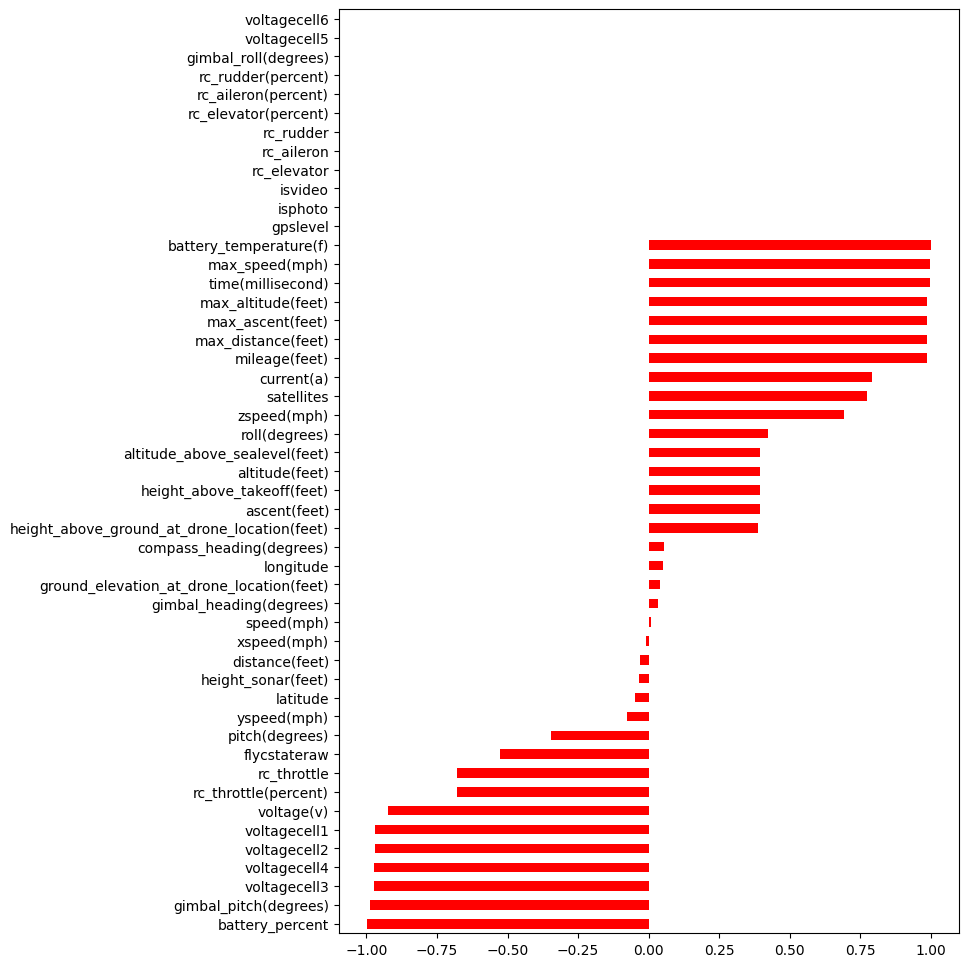

In [88]:
plt.figure(figsize=(8,12))
dfcorr["battery_temperature(f)"].sort_values(ascending=True).plot(kind="barh",color="red")
plt.show()

<Axes: >

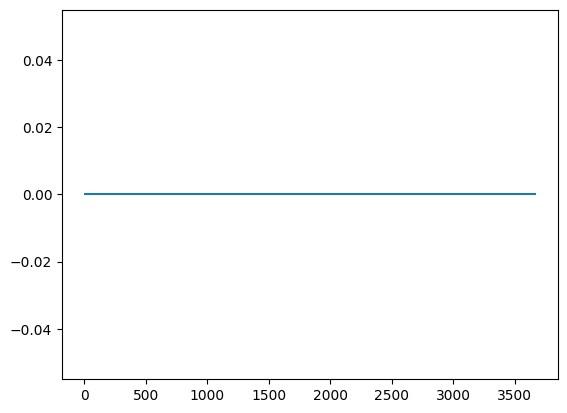

In [57]:
df["voltagecell6"].plot(kind="line")

In [58]:
# print(sum(df[""]))

In [66]:
ddx = df_num.loc[:,df_num.sum() != 0]
ddx.shape

(19, 41)

In [ ]:
ddx.copy()


,time(millisecond),latitude,longitude,height_above_takeoff(feet),height_above_ground_at_drone_location(feet),ground_elevation_at_drone_location(feet),altitude_above_sealevel(feet),height_sonar(feet),speed(mph),distance(feet),...,battery_percent,voltagecell1,voltagecell2,voltagecell3,voltagecell4,current(a),battery_temperature(f),altitude(feet),ascent(feet),flycstateraw
2,200,38.104154,-84.757244,0.000000,0.000000,893.551412,893.551412,0.328084,0.000000,0.029301,...,98,4.256,4.264,4.265,4.264,1.218,84.11,893.551412,0.000000,41
29,3200,38.104155,-84.757244,2.296588,2.329396,893.518604,895.848000,2.952756,0.223694,0.603022,...,98,4.178,4.195,4.231,4.242,3.480,84.11,895.848000,2.296588,6
2797,301300,38.105495,-84.757316,10.826772,19.586615,884.791569,904.378184,26.902888,0.447388,489.839254,...,79,3.944,3.946,3.938,3.929,11.024,107.51,904.378184,10.826772,15
3000,323400,38.105420,-84.757320,164.698168,173.720478,884.529102,1058.249580,0.000000,12.526864,462.657495,...,77,3.847,3.877,3.883,3.873,13.740,109.31,1058.249580,164.698168,15
3277,352200,38.104160,-84.757246,163.385832,163.418640,893.518604,1056.937244,0.000000,0.000000,2.177913,...,75,3.887,3.911,3.912,3.902,10.080,112.91,1056.937244,163.385832,12
3371,362000,38.104159,-84.757242,132.874020,132.874020,893.551412,1026.425432,0.000000,0.223694,1.967159,...,75,3.919,3.940,3.941,3.934,6.684,112.91,1026.425432,132.874020,12
3425,367600,38.104143,-84.757244,87.598428,87.598428,893.551412,981.149840,0.000000,0.223694,3.898327,...,74,3.903,3.929,3.931,3.924,8.684,112.91,981.149840,87.598428,12
3428,367900,38.104143,-84.757245,85.958008,85.990816,893.518604,979.509420,0.000000,0.223694,3.906037,...,74,3.903,3.929,3.931,3.924,8.684,112.91,979.509420,85.958008,12
3433,368400,38.104143,-84.757245,82.677168,82.709976,893.518604,976.228580,0.000000,0.000000,4.022179,...,74,3.891,3.917,3.922,3.918,8.876,112.91,976.228580,82.677168,12
3442,369300,38.104142,-84.757244,77.099740,77.099740,893.551412,970.651152,0.000000,0.313172,4.465420,...,74,3.898,3.919,3.923,3.918,9.240,112.91,970.651152,77.099740,12


In [62]:
dfx = df_num.copy()

for col in df_num.columns:
    if df_num[col].sum() == 0:
        dfx = dfx.drop(columns=col) 

dfx.head()

,time(millisecond),latitude,longitude,height_above_takeoff(feet),height_above_ground_at_drone_location(feet),ground_elevation_at_drone_location(feet),altitude_above_sealevel(feet),height_sonar(feet),speed(mph),distance(feet),...,battery_percent,voltagecell1,voltagecell2,voltagecell3,voltagecell4,current(a),battery_temperature(f),altitude(feet),ascent(feet),flycstateraw
2,200,38.104154,-84.757244,0.000000,0.000000,893.551412,893.551412,0.328084,0.000000,0.029301,...,98,4.256,4.264,4.265,4.264,1.218,84.11,893.551412,0.000000,41
29,3200,38.104155,-84.757244,2.296588,2.329396,893.518604,895.848000,2.952756,0.223694,0.603022,...,98,4.178,4.195,4.231,4.242,3.480,84.11,895.848000,2.296588,6
2797,301300,38.105495,-84.757316,10.826772,19.586615,884.791569,904.378184,26.902888,0.447388,489.839254,...,79,3.944,3.946,3.938,3.929,11.024,107.51,904.378184,10.826772,15
3000,323400,38.105420,-84.757320,164.698168,173.720478,884.529102,1058.249580,0.000000,12.526864,462.657495,...,77,3.847,3.877,3.883,3.873,13.740,109.31,1058.249580,164.698168,15
3277,352200,38.104160,-84.757246,163.385832,163.418640,893.518604,1056.937244,0.000000,0.000000,2.177913,...,75,3.887,3.911,3.912,3.902,10.080,112.91,1056.937244,163.385832,12


In [63]:
print(dfx.shape)
print(df_num.shape)

(19, 41)
(19, 49)


In [72]:
X = dfx.drop(columns=["battery_temperature(f)", ])
y = dfx["battery_temperature(f)"]

In [73]:
print(X.shape)
print(y.shape)

(19, 40)
(19,)


In [79]:
from sklearn.linear_model import Lasso, Ridge, LassoCV
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

lasso = Lasso(alpha=0.4, random_state=42)
lasso.fit(X_trans, y)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.4
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [78]:
coef = pd.Series(lasso.coef_, index=X.columns)

selected_features = coef[coef != 0]
removed_features = coef[coef == 0]

print("Selected features:")
print(selected_features)

print("\nRemoved features:")
[x for x in removed_features.index.tolist()]


Selected features:
max_altitude(feet)       1.281330
max_speed(mph)           6.006549
max_distance(feet)       0.766422
gimbal_pitch(degrees)   -0.030632
battery_percent         -0.332958
dtype: float64

Removed features:


['time(millisecond)',
 'latitude',
 'longitude',
 'height_above_takeoff(feet)',
 'height_above_ground_at_drone_location(feet)',
 'ground_elevation_at_drone_location(feet)',
 'altitude_above_sealevel(feet)',
 'height_sonar(feet)',
 'speed(mph)',
 'distance(feet)',
 'mileage(feet)',
 'satellites',
 'gpslevel',
 'voltage(v)',
 'max_ascent(feet)',
 'xspeed(mph)',
 'yspeed(mph)',
 'zspeed(mph)',
 'compass_heading(degrees)',
 'pitch(degrees)',
 'roll(degrees)',
 'rc_elevator',
 'rc_aileron',
 'rc_throttle',
 'rc_rudder',
 'rc_throttle(percent)',
 'gimbal_heading(degrees)',
 'voltagecell1',
 'voltagecell2',
 'voltagecell3',
 'voltagecell4',
 'current(a)',
 'altitude(feet)',
 'ascent(feet)',
 'flycstateraw']

In [80]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(
    alphas=np.logspace(-4, 1, 50),
    cv=5,
    random_state=42
)

lasso_cv.fit(X_trans, y)

best_alpha = lasso_cv.alpha_
print("Best alpha:", best_alpha)


Best alpha: 0.013894954943731374


c:\Users\Owner\facebook_marketplace\facebook_marketplace\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.754e-01, tolerance: 1.468e-01
  model = cd_fast.enet_coordinate_descent(


In [82]:
coef = pd.Series(lasso_cv.coef_, index=X.columns)
selected_features = coef[coef != 0]

print("Selected features:")
print(selected_features)

Selected features:
time(millisecond)                              3.992622e+00
height_above_takeoff(feet)                     1.481988e-01
height_above_ground_at_drone_location(feet)    2.078965e-01
mileage(feet)                                  1.413706e+00
satellites                                     9.050734e-02
max_speed(mph)                                 1.934944e+00
max_distance(feet)                             1.232535e+00
yspeed(mph)                                   -1.762349e-02
rc_throttle                                   -5.433081e-02
rc_throttle(percent)                          -1.752984e-17
gimbal_pitch(degrees)                         -3.751197e-03
dtype: float64


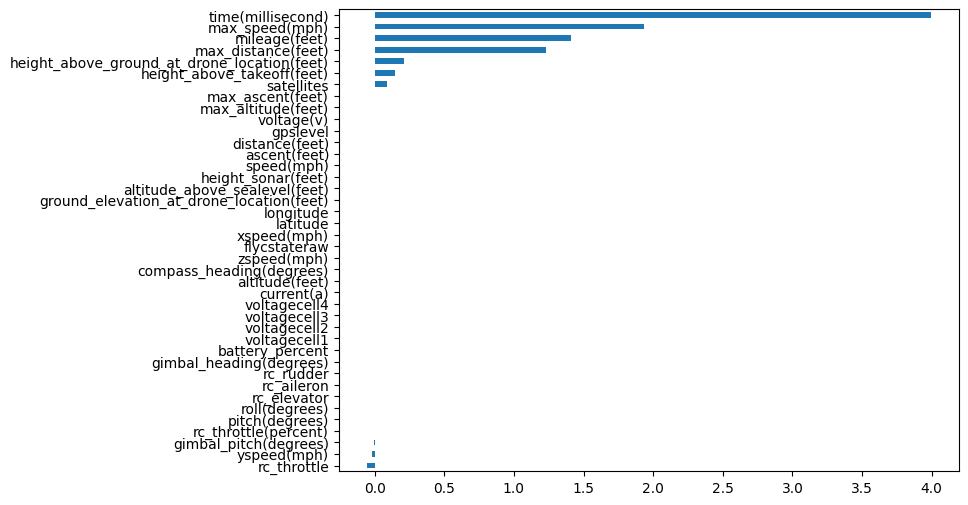

In [84]:
plt.figure(figsize=(8,12))
coef.sort_values().plot(kind="barh", figsize=(8,6))
plt.show()
